# Introdução à Classificação

Este notebook apresenta os conceitos fundamentais de classificação em machine learning.


In [1]:
# Imports básicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Configuração de plotting
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (10, 6)

## Objetivos da Aula

- Entender o que é classificação
- Tipos de classificação (binária, multiclasse)
- Conceitos fundamentais
- Preparação de dados para classificação


## 1. O que é Classificação?

A **classificação** é um dos paradigmas fundamentais do aprendizado supervisionado, onde o objetivo é predizer a **categoria** ou **classe** à qual uma nova observação pertence, baseando-se em um conjunto de dados de treinamento.

### Definição Formal

Dado um conjunto de dados de treinamento $\mathcal{D} = \{(x_i, y_i)\}_{i=1}^n$, onde:

- $x_i \in \mathcal{X}$ são os **vetores de características** (features)
- $y_i \in \mathcal{Y}$ são os **rótulos de classe** (labels)
- $\mathcal{Y}$ é um conjunto discreto e finito de classes

O objetivo é aprender uma função $f: \mathcal{X} \rightarrow \mathcal{Y}$ que mapeia características para classes, minimizando o erro de predição em dados não vistos.

### Características Principais

1. **Variável target discreta**: Diferente da regressão, onde predizemos valores contínuos
2. **Aprendizado supervisionado**: Necessitamos de dados rotulados para treinamento
3. **Tomada de decisão**: O modelo deve tomar decisões categóricas sobre novas observações


In [2]:
# Exemplo ilustrativo: Classificação de emails
# Características (features): frequência de palavras, tamanho do email, etc.
# Classes: ['spam', 'não-spam']

import pandas as pd
import numpy as np

# Simulando dados de emails
np.random.seed(42)
n_emails = 1000

# Features simuladas
emails_data = {
    "freq_palavra_gratis": np.random.exponential(0.5, n_emails),
    "freq_palavra_oferta": np.random.exponential(0.3, n_emails),
    "tamanho_email": np.random.normal(200, 50, n_emails),
    "num_links": np.random.poisson(2, n_emails),
}

# Criando regra para determinar spam (para fins didáticos)
emails_df = pd.DataFrame(emails_data)
emails_df["is_spam"] = (
    (emails_df["freq_palavra_gratis"] > 1) | (emails_df["freq_palavra_oferta"] > 0.8) | (emails_df["num_links"] > 5)
).astype(int)

# Convertendo para labels textuais
emails_df["classe"] = emails_df["is_spam"].map({0: "não-spam", 1: "spam"})

print("Exemplo de dados de classificação:")
print(emails_df.head(10))
print(f"\nDistribuição de classes:")
print(emails_df["classe"].value_counts())

Exemplo de dados de classificação:
   freq_palavra_gratis  freq_palavra_oferta  tamanho_email  num_links  \
0             0.234634             0.061419     156.100871          3   
1             1.505061             0.234201     158.655982          3   
2             0.658373             0.618943     188.676055          1   
3             0.456471             0.395282     218.368275          1   
4             0.084812             0.492838     245.679231          1   
5             0.084798             0.322571     159.841052          2   
6             0.029919             0.353566     274.634428          2   
7             1.005615             0.567532     186.443820          1   
8             0.459541             0.086172     198.931635          1   
9             0.615625             0.201665     162.639416          3   

   is_spam    classe  
0        0  não-spam  
1        1      spam  
2        0  não-spam  
3        0  não-spam  
4        0  não-spam  
5        0  não-spam  


## 2. Tipos de Classificação

### 2.1 Classificação Binária

Na **classificação binária**, temos apenas duas classes possíveis: $\mathcal{Y} = \{0, 1\}$ ou $\mathcal{Y} = \{\text{Classe A}, \text{Classe B}\}$.

**Exemplos:**

- Diagnóstico médico: doente vs. saudável
- Detecção de fraude: fraudulento vs. legítimo
- Análise de sentimento: positivo vs. negativo
- Filtro de spam: spam vs. não-spam

**Características:**

- Problema mais simples computacionalmente
- Métricas específicas (sensibilidade, especificidade, AUC-ROC)
- Muitos algoritmos otimizados para este caso

### 2.2 Classificação Multiclasse

Na **classificação multiclasse**, temos múltiplas classes mutuamente exclusivas: $|\mathcal{Y}| > 2$.

**Exemplos:**

- Reconhecimento de dígitos: {0, 1, 2, ..., 9}
- Classificação de espécies: {setosa, versicolor, virginica}
- Categorização de documentos: {esportes, política, tecnologia, saúde}
- Reconhecimento de objetos: {carro, bicicleta, pessoa, cachorro}

**Desafios:**

- Complexidade computacional aumenta com o número de classes
- Necessidade de estratégias como One-vs-Rest ou One-vs-One
- Balanceamento entre classes torna-se mais crítico

### 2.3 Classificação Multi-label

Na **classificação multi-label**, uma observação pode pertencer a múltiplas classes simultaneamente.

**Exemplos:**

- Categorização de filmes: {ação, comédia, drama} → um filme pode ser [ação, comédia]
- Diagnóstico médico: um paciente pode ter múltiplas condições
- Marcação de fotos: {pessoa, natureza, animais} → uma foto pode ter todos

**Características especiais:**

- Não há exclusividade mútua entre classes
- Métricas diferentes (Hamming Loss, Jaccard Index)
- Algoritmos específicos necessários


In [3]:
# Demonstração dos diferentes tipos de classificação

# 1. Classificação Binária - Dataset Sintético
from sklearn.datasets import make_classification

X_binary, y_binary = make_classification(
    n_samples=300, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=42
)

# 2. Classificação Multiclasse - Iris Dataset
from sklearn.datasets import load_iris

iris = load_iris()
X_multi, y_multi = iris.data[:, :2], iris.target  # Usando apenas 2 features para visualização

# 3. Simulação Multi-label
np.random.seed(42)
n_samples = 200
X_multilabel = np.random.randn(n_samples, 2)

# Criando múltiplas labels baseadas em diferentes critérios
y_multilabel = np.zeros((n_samples, 3))
y_multilabel[:, 0] = (X_multilabel[:, 0] > 0).astype(int)  # Label 1: X1 > 0
y_multilabel[:, 1] = (X_multilabel[:, 1] > 0).astype(int)  # Label 2: X2 > 0
y_multilabel[:, 2] = (np.sum(X_multilabel**2, axis=1) > 1).astype(int)  # Label 3: distância do centro

print("Exemplos dos diferentes tipos:")
print(f"Binária - Classes únicas: {np.unique(y_binary)}")
print(f"Multiclasse - Classes únicas: {np.unique(y_multi)} ({iris.target_names})")
print(f"Multi-label - Primeiras 5 observações:")
print(y_multilabel[:5])

Exemplos dos diferentes tipos:
Binária - Classes únicas: [0 1]
Multiclasse - Classes únicas: [0 1 2] (['setosa' 'versicolor' 'virginica'])
Multi-label - Primeiras 5 observações:
[[1. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]
 [1. 1. 1.]
 [0. 1. 0.]]


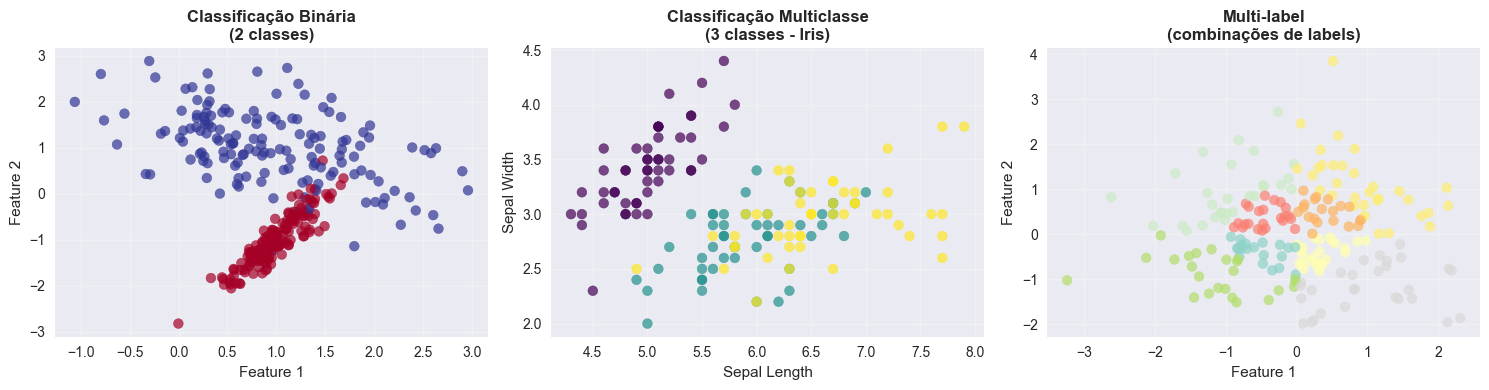


ESTATÍSTICAS DOS DATASETS
Binária:     300 amostras, 2 features
Multiclasse: 150 amostras, 2 features
Multi-label: 200 amostras, 2 features, 3 labels


In [4]:
# Visualização dos diferentes tipos de classificação

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Binária
scatter1 = axes[0].scatter(X_binary[:, 0], X_binary[:, 1], c=y_binary, cmap="RdYlBu", alpha=0.7, s=50)
axes[0].set_title("Classificação Binária\n(2 classes)", fontsize=12, fontweight="bold")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
axes[0].grid(True, alpha=0.3)

# Multiclasse
scatter2 = axes[1].scatter(X_multi[:, 0], X_multi[:, 1], c=y_multi, cmap="viridis", alpha=0.7, s=50)
axes[1].set_title("Classificação Multiclasse\n(3 classes - Iris)", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Sepal Length")
axes[1].set_ylabel("Sepal Width")
axes[1].grid(True, alpha=0.3)

# Multi-label (mostrando combinações)
y_combined = y_multilabel[:, 0] + 2 * y_multilabel[:, 1] + 4 * y_multilabel[:, 2]
scatter3 = axes[2].scatter(X_multilabel[:, 0], X_multilabel[:, 1], c=y_combined, cmap="Set3", alpha=0.7, s=50)
axes[2].set_title("Multi-label\n(combinações de labels)", fontsize=12, fontweight="bold")
axes[2].set_xlabel("Feature 1")
axes[2].set_ylabel("Feature 2")
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estatísticas dos datasets
print("\n" + "=" * 60)
print("ESTATÍSTICAS DOS DATASETS")
print("=" * 60)
print(f"Binária:     {X_binary.shape[0]} amostras, {X_binary.shape[1]} features")
print(f"Multiclasse: {X_multi.shape[0]} amostras, {X_multi.shape[1]} features")
print(
    f"Multi-label: {X_multilabel.shape[0]} amostras, {X_multilabel.shape[1]} features, {y_multilabel.shape[1]} labels"
)

## 3. Conceitos Fundamentais

### 3.1 Fronteira de Decisão (Decision Boundary)

A **fronteira de decisão** é a superfície que separa as diferentes regiões do espaço de características, onde cada região corresponde a uma classe diferente.

**Propriedades importantes:**

- Pode ser linear ou não-linear
- Sua complexidade depende do algoritmo utilizado
- Determina a capacidade de generalização do modelo

### 3.2 Espaço de Características (Feature Space)

O **espaço de características** $\mathcal{X}$ é o espaço matemático onde cada dimensão representa uma característica (feature) dos dados.

**Conceitos relacionados:**

- **Dimensionalidade**: número de features
- **Maldição da dimensionalidade**: problemas em altas dimensões
- **Separabilidade**: quão bem as classes podem ser distinguidas

### 3.3 Erro de Classificação

**Erro de Treinamento** ($\text{err}_{train}$):
$$\text{err}_{train} = \frac{1}{n} \sum_{i=1}^n \mathbb{I}[f(x_i) \neq y_i]$$

**Erro de Teste** ($\text{err}_{test}$):
$$\text{err}_{test} = \mathbb{E}[\mathbb{I}[f(X) \neq Y]]$$

Onde $\mathbb{I}[\cdot]$ é a função indicadora.

### 3.4 Overfitting vs. Underfitting

- **Underfitting**: modelo muito simples, alto erro de treinamento e teste
- **Overfitting**: modelo muito complexo, baixo erro de treinamento, alto erro de teste
- **Objetivo**: encontrar o equilíbrio ideal (bias-variance tradeoff)


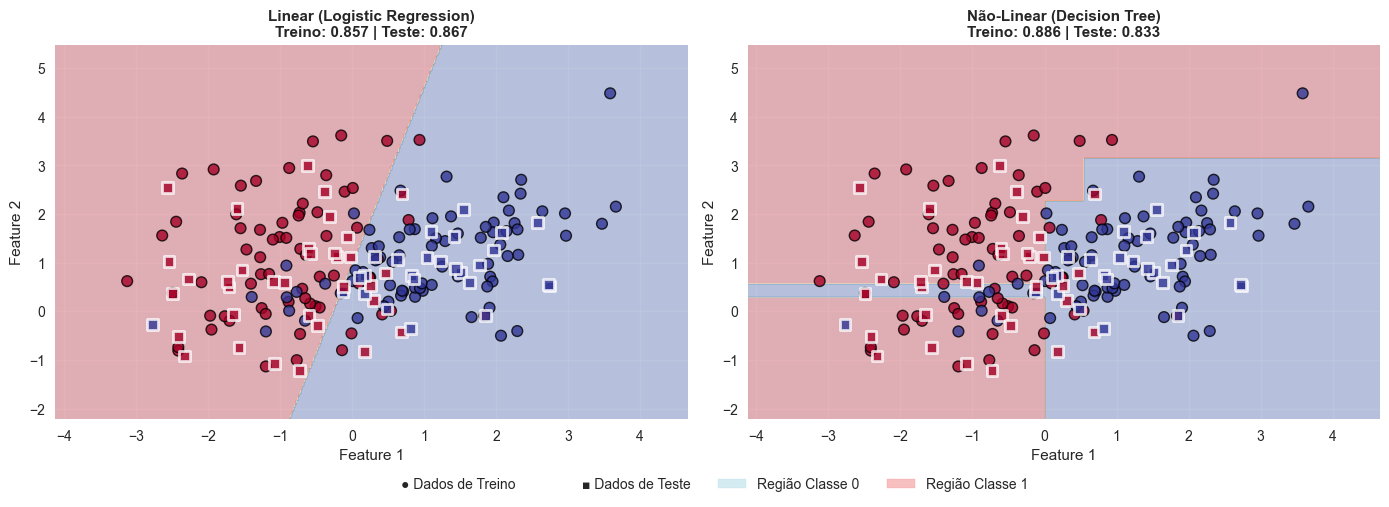

ANÁLISE DAS FRONTEIRAS DE DECISÃO:
• Modelo Linear: fronteira reta, mais simples
• Modelo Não-Linear: fronteira complexa, pode capturar padrões mais sutis
• Comparar acurácias de treino vs. teste para detectar overfitting


In [6]:
# Demonstração visual dos conceitos fundamentais

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.patches as patches

# Gerando dataset para demonstração
np.random.seed(42)
X_demo, y_demo = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=42
)

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_demo, y_demo, test_size=0.3, random_state=42)

# Treinando diferentes modelos para mostrar fronteiras de decisão
models = {
    "Linear (Logistic Regression)": LogisticRegression(random_state=42),
    "Não-Linear (Decision Tree)": DecisionTreeClassifier(max_depth=3, random_state=42),
}

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)

    # Criando grade para visualizar fronteira de decisão
    h = 0.02
    x_min, x_max = X_demo[:, 0].min() - 1, X_demo[:, 0].max() + 1
    y_min, y_max = X_demo[:, 1].min() - 1, X_demo[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predições para a grade
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotando fronteira de decisão
    axes[idx].contourf(xx, yy, Z, alpha=0.3, cmap="RdYlBu")

    # Plotando dados de treino
    scatter_train = axes[idx].scatter(
        X_train[:, 0], X_train[:, 1], c=y_train, cmap="RdYlBu", alpha=0.8, s=60, edgecolors="black", linewidths=1
    )

    # Plotando dados de teste com marcador diferente
    axes[idx].scatter(
        X_test[:, 0],
        X_test[:, 1],
        c=y_test,
        cmap="RdYlBu",
        alpha=0.8,
        s=60,
        marker="s",
        edgecolors="white",
        linewidths=2,
    )

    # Calculando acurácias
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    axes[idx].set_title(f"{name}\nTreino: {train_acc:.3f} | Teste: {test_acc:.3f}", fontsize=11, fontweight="bold")
    axes[idx].set_xlabel("Feature 1")
    axes[idx].set_ylabel("Feature 2")
    axes[idx].grid(True, alpha=0.3)

# Adicionando legenda
legend_elements = [
    patches.Patch(color="none", label="● Dados de Treino"),
    patches.Patch(color="none", label="■ Dados de Teste"),
    patches.Patch(color="lightblue", alpha=0.5, label="Região Classe 0"),
    patches.Patch(color="lightcoral", alpha=0.5, label="Região Classe 1"),
]
fig.legend(handles=legend_elements, loc="center", bbox_to_anchor=(0.5, 0.02), ncol=4)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

print("ANÁLISE DAS FRONTEIRAS DE DECISÃO:")
print("=" * 50)
print("• Modelo Linear: fronteira reta, mais simples")
print("• Modelo Não-Linear: fronteira complexa, pode capturar padrões mais sutis")
print("• Comparar acurácias de treino vs. teste para detectar overfitting")

## 4. Preparação de Dados para Classificação

A qualidade dos dados é fundamental para o sucesso de qualquer modelo de classificação. Esta seção aborda os principais aspectos da preparação de dados.

### 4.1 Análise Exploratória de Dados (EDA)

**Objetivos principais:**

1. Entender a distribuição das classes
2. Identificar padrões nos dados
3. Detectar problemas de qualidade
4. Orientar decisões de pré-processamento

### 4.2 Tratamento de Dados Ausentes

**Estratégias principais:**

- **Remoção**: quando a quantidade é pequena
- **Imputação**: média, mediana, moda, ou métodos avançados
- **Indicadores**: criar variáveis dummy para valores ausentes

### 4.3 Codificação de Variáveis Categóricas

**Técnicas essenciais:**

- **One-Hot Encoding**: para variáveis nominais
- **Label Encoding**: para variáveis ordinais
- **Target Encoding**: para alta cardinalidade

### 4.4 Normalização e Padronização

**Por que é importante:**

- Algoritmos baseados em distância são sensíveis à escala
- Melhora convergência de algoritmos de otimização
- Previne dominância de features com escalas maiores

**Técnicas:**

- **StandardScaler**: $z = \frac{x - \mu}{\sigma}$
- **MinMaxScaler**: $z = \frac{x - x_{min}}{x_{max} - x_{min}}$
- **RobustScaler**: usando mediana e IQR

### 4.5 Balanceamento de Classes

**Problema**: classes desbalanceadas podem enviesar o modelo

**Soluções:**

- **Undersampling**: reduzir classe majoritária
- **Oversampling**: aumentar classe minoritária (SMOTE)
- **Class weights**: ajustar pesos durante treinamento


In [7]:
# Exemplo prático: Preparação completa de dados

# Criando dataset sintético com problemas reais
np.random.seed(42)
n_samples = 1000

# Simulando dados com diferentes escalas e tipos
raw_data = {
    "idade": np.random.normal(35, 10, n_samples),
    "salario": np.random.normal(50000, 15000, n_samples),
    "experiencia_anos": np.random.normal(8, 3, n_samples),
    "educacao": np.random.choice(["Ensino Médio", "Graduação", "Pós-graduação"], n_samples),
    "cidade": np.random.choice(["SP", "RJ", "BH", "POA", "Salvador"], n_samples),
    "score_credito": np.random.normal(650, 100, n_samples),
}

# Criando DataFrame
df_raw = pd.DataFrame(raw_data)

# Introduzindo valores ausentes propositalmente
missing_indices = np.random.choice(df_raw.index, size=100, replace=False)
df_raw.loc[missing_indices[:50], "salario"] = np.nan
df_raw.loc[missing_indices[50:], "score_credito"] = np.nan

# Criando variável target baseada em regras lógicas
df_raw["aprovado_credito"] = (
    (df_raw["salario"].fillna(df_raw["salario"].median()) > 45000)
    & (df_raw["score_credito"].fillna(df_raw["score_credito"].median()) > 600)
    & (df_raw["experiencia_anos"] > 5)
).astype(int)

print("DATASET ORIGINAL (problemas identificados):")
print("=" * 50)
print(f"Shape: {df_raw.shape}")
print(f"\nValores ausentes:")
print(df_raw.isnull().sum())
print(f"\nDistribuição da variável target:")
print(df_raw["aprovado_credito"].value_counts())
print(f"\nEstatísticas básicas:")
print(df_raw.describe())

DATASET ORIGINAL (problemas identificados):
Shape: (1000, 7)

Valores ausentes:
idade                0
salario             50
experiencia_anos     0
educacao             0
cidade               0
score_credito       50
aprovado_credito     0
dtype: int64

Distribuição da variável target:
aprovado_credito
0    583
1    417
Name: count, dtype: int64

Estatísticas básicas:
             idade       salario  experiencia_anos  score_credito  \
count  1000.000000    950.000000       1000.000000     950.000000   
mean     35.193321  50873.270395          8.017503     651.794112   
std       9.792159  14916.252735          2.950363      96.782918   
min       2.587327   5894.170480         -1.058536     345.407117   
25%      28.524097  40863.655274          6.056001     588.657879   
50%      35.253006  50756.044671          7.999248     648.749362   
75%      41.479439  60622.819799          9.982746     717.185658   
max      73.527315  97896.613518         19.778713    1055.255012   

      

In [8]:
# Pipeline completo de pré-processamento

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. TRATAMENTO DE DADOS AUSENTES
print("ETAPA 1: Tratamento de valores ausentes")
print("=" * 50)

# Estratégia: imputação com mediana para variáveis numéricas
numeric_imputer = SimpleImputer(strategy="median")
df_processed = df_raw.copy()

# Aplicando imputação
numeric_columns = ["salario", "score_credito"]
for col in numeric_columns:
    if df_processed[col].isnull().sum() > 0:
        df_processed[col] = numeric_imputer.fit_transform(df_processed[[col]]).flatten()

print(f"Valores ausentes após imputação: {df_processed.isnull().sum().sum()}")

# 2. CODIFICAÇÃO DE VARIÁVEIS CATEGÓRICAS
print("\nETAPA 2: Codificação de variáveis categóricas")
print("=" * 50)

# One-Hot Encoding para variáveis nominais
df_encoded = pd.get_dummies(df_processed, columns=["educacao", "cidade"], prefix=["edu", "cidade"])

print(f"Colunas após encoding: {df_encoded.shape[1]}")
print("Novas colunas criadas:")
new_cols = [col for col in df_encoded.columns if col.startswith(("edu_", "cidade_"))]
print(new_cols[:5], "...")

# 3. NORMALIZAÇÃO
print("\nETAPA 3: Normalização das features numéricas")
print("=" * 50)

# Separando features e target
X = df_encoded.drop("aprovado_credito", axis=1)
y = df_encoded["aprovado_credito"]

# Identificando colunas numéricas para normalização
numeric_features = ["idade", "salario", "experiencia_anos", "score_credito"]

# Aplicando StandardScaler
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_features] = scaler.fit_transform(X[numeric_features])

print("Antes da normalização:")
print(X[numeric_features].describe().round(2))
print("\nApós normalização:")
print(X_scaled[numeric_features].describe().round(2))

print(f"\nResumo do pipeline de preparação:")
print(f"• Tratamento de {df_raw.isnull().sum().sum()} valores ausentes")
print(f"• Codificação de {len(['educacao', 'cidade'])} variáveis categóricas")
print(f"• Normalização de {len(numeric_features)} variáveis numéricas")
print(f"• Dataset final: {X_scaled.shape[0]} amostras × {X_scaled.shape[1]} features")

ETAPA 1: Tratamento de valores ausentes
Valores ausentes após imputação: 0

ETAPA 2: Codificação de variáveis categóricas
Colunas após encoding: 13
Novas colunas criadas:
['edu_Ensino Médio', 'edu_Graduação', 'edu_Pós-graduação', 'cidade_BH', 'cidade_POA'] ...

ETAPA 3: Normalização das features numéricas
Antes da normalização:
         idade   salario  experiencia_anos  score_credito
count  1000.00   1000.00           1000.00        1000.00
mean     35.19  50867.41              8.02         651.64
std       9.79  14538.20              2.95          94.33
min       2.59   5894.17             -1.06         345.41
25%      28.52  41559.68              6.06         591.69
50%      35.25  50756.04              8.00         648.75
75%      41.48  59798.26              9.98         711.91
max      73.53  97896.61             19.78        1055.26

Após normalização:
         idade  salario  experiencia_anos  score_credito
count  1000.00  1000.00           1000.00        1000.00
mean     -0.00

## 5. Resumo e Próximos Conteúdos

### O que aprendemos nesta aula:

1. **Definição de Classificação**

   - Aprendizado supervisionado para predição de categorias
   - Diferença fundamental com regressão
   - Conceitos matemáticos fundamentais

2. **Tipos de Classificação**

   - **Binária**: 2 classes mutuamente exclusivas
   - **Multiclasse**: múltiplas classes mutuamente exclusivas
   - **Multi-label**: múltiplas classes não-exclusivas

3. **Conceitos Fundamentais**

   - Fronteiras de decisão e sua importância
   - Espaço de características
   - Bias-variance tradeoff
   - Overfitting vs. underfitting

4. **Preparação de Dados**
   - Pipeline completo de pré-processamento
   - Tratamento de dados ausentes
   - Codificação de variáveis categóricas
   - Normalização e padronização

### Próximos conteúdos:

- **02_knn.ipynb**: Algoritmo K-Nearest Neighbors (KNN)
- **03_decision_trees.ipynb**: Árvores de Decisão
